In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import scikit_posthocs

import seaborn as sns
sns.set(rc={'figure.figsize':[12,8]})

# Reading data
df = pd.read_pickle('STING_DB.pkl')

# Ordering levels and creating new variables
df['grade'] = df['lesion'].replace({'Non-tumor':np.nan,'CIS':np.nan})

df = df.astype({'pt':'category','grade':'category'})
df['pt'].cat.reorder_categories(['Tis','Ta','T1','T2'], ordered=True, inplace=True)
df['grade'].cat.reorder_categories(['Low-grade','High-grade','Invasive'], ordered=True, inplace=True)

df.head()

n_patient           id label  array  n_cores          sp    sp_date  turb  \
0          1  19870070301    OO    935      1.0   05-S-9869 2005-12-07     4   
1          1  19870070301    OO    931      3.0  07-S-11432 2007-11-14     5   
2          1  19870070301    OO    931      3.0  07-S-11432 2007-11-14     5   
3          1  19870070301    OO    931      3.0  07-S-11432 2007-11-14     5   
4          1  19870070301    OO    931      3.0   05-S-4662 2005-06-10     3   

   histo      lesion  ... mitomycin progression_stage_any  \
0      4   Non-tumor  ...         0                    No   
1      1   Low-grade  ...         0                    No   
2      1   Low-grade  ...         0                    No   
3      1   Low-grade  ...         0                    No   
4      2  High-grade  ...         0                    No   

  progression_stage_next recurrence_any recurrence_next  \
0                    Yes            Yes             Yes   
1                     No            Yes              No   
2                     No            Yes              No   
3                     No            Yes              No   
4                     No            Yes              No   

   progression_grade_any  progression_grade_next   fu_months  sp_bcg_timing  \
0                     No                     Yes  270.933333            Pre   
1                     No                      No  270.933333            Pre   
2                     No                      No  270.933333            Pre   
3                     No                      No  270.933333            Pre   
4                     No                      No  270.933333            Pre   

        grade  
0         NaN  
1   Low-grade  
2   Low-grade  
3   Low-grade  
4  High-grade  

[5 rows x 65 columns]

# Marker expression by stage

## STING in tumor cells

In [2]:
df.groupby('pt')['sting_tumor'].describe().round()

count  mean   std  min  25%   50%   75%    max
pt                                                 
Tis    6.0  18.0  29.0  0.0  0.0   0.0  38.0   60.0
Ta   135.0  22.0  30.0  0.0  0.0  10.0  20.0  100.0
T1   111.0  20.0  33.0  0.0  0.0   0.0  20.0  100.0
T2    10.0  10.0  12.0  0.0  0.0  10.0  10.0   40.0

In [3]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['sting_tumor'].values for name, data in df.groupby('pt')], nan_policy='omit')[1]

0.1368633394405794

In [4]:
# Posthoc Dunn's test 
levels = df['pt'].dropna().unique()
dunn = scikit_posthocs.posthoc_dunn([data['sting_tumor'].values for name, data in df.groupby('pt')])
pd.DataFrame(np.array(dunn), columns=levels, index=levels)

Ta       Tis        T1        T2
Ta   1.000000  0.558548  0.862637  0.872667
Tis  0.558548  1.000000  0.180583  0.622574
T1   0.862637  0.180583  1.000000  0.975244
T2   0.872667  0.622574  0.975244  1.000000

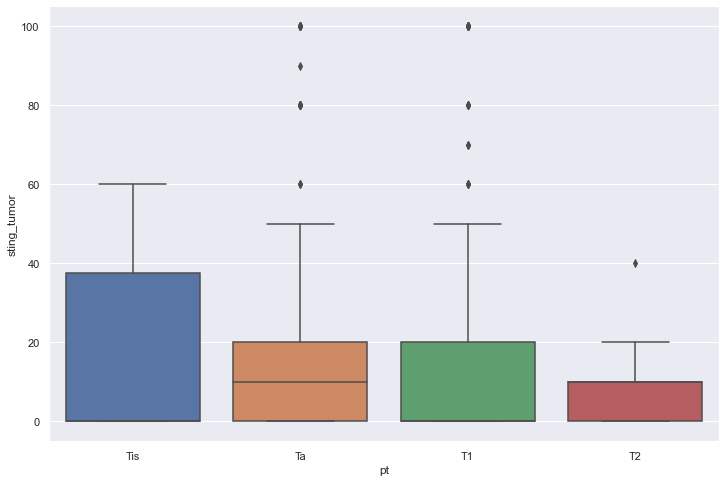

In [5]:
g = sns.boxplot(x='pt', y='sting_tumor', data=df)

## STING in peritumoral lymphocytes

In [6]:
df.groupby('pt')['sting_inflammatory'].describe().round()

count   mean   std    min    25%    50%    75%    max
pt                                                        
Tis    4.0   50.0  58.0    0.0    0.0   50.0  100.0  100.0
Ta    73.0   98.0   6.0   80.0  100.0  100.0  100.0  100.0
T1    69.0   97.0   7.0   80.0  100.0  100.0  100.0  100.0
T2     3.0  100.0   0.0  100.0  100.0  100.0  100.0  100.0

In [7]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['sting_inflammatory'].values for name, data in df.groupby('pt')], nan_policy='omit')[1]

0.08901153339993913

In [8]:
# Posthoc Dunn's test 
dunn = scikit_posthocs.posthoc_dunn([data['sting_inflammatory'].values for name, data in df.groupby('pt')])
pd.DataFrame(np.array(dunn), columns=levels, index=levels)

Ta       Tis        T1        T2
Ta   1.000000  0.585592  0.618193  0.641485
Tis  0.585592  1.000000  0.887942  0.897833
T1   0.618193  0.887942  1.000000  0.866293
T2   0.641485  0.897833  0.866293  1.000000

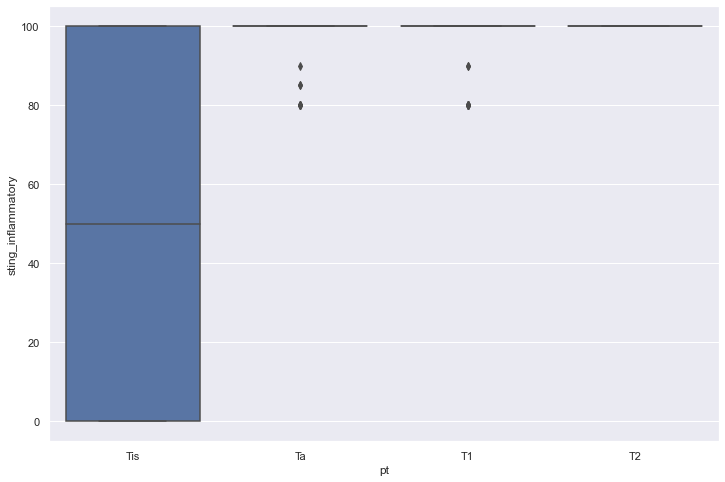

In [9]:
g = sns.boxplot(x='pt', y='sting_inflammatory', data=df)

## cGAS in tumor cells

In [10]:
df.groupby('pt')['cgas_tumor'].describe().round()

count  mean   std  min   25%   50%    75%    max
pt                                                   
Tis    6.0  47.0  45.0  0.0   5.0  50.0   80.0  100.0
Ta   135.0  63.0  40.0  0.0  20.0  80.0  100.0  100.0
T1   110.0  69.0  38.0  0.0  40.0  90.0  100.0  100.0
T2    10.0  14.0  26.0  0.0   0.0   0.0    9.0   80.0

In [11]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['cgas_tumor'].values for name, data in df.groupby('pt')], nan_policy='omit')[1]

0.00019729412587704903

In [12]:
# Posthoc Dunn's test 
dunn = scikit_posthocs.posthoc_dunn([data['cgas_tumor'].values for name, data in df.groupby('pt')])
pd.DataFrame(np.array(dunn), columns=levels, index=levels)

Ta       Tis        T1        T2
Ta   1.000000  0.504904  0.327670  0.395860
Tis  0.504904  1.000000  0.303542  0.028766
T1   0.327670  0.303542  1.000000  0.010174
T2   0.395860  0.028766  0.010174  1.000000

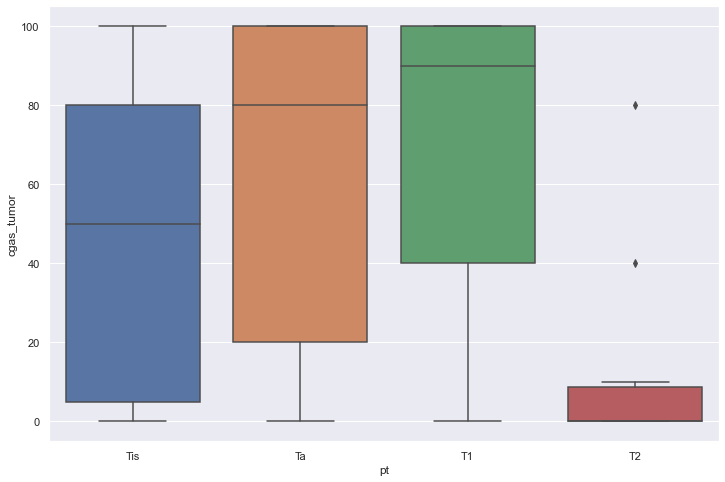

In [13]:
g = sns.boxplot(x='pt', y='cgas_tumor', data=df)

## cGAS in peritumoral lymphocytes

In [14]:
df.groupby('pt')['cgas_inflammatory'].describe().round()

count  mean   std  min  25%   50%   75%    max
pt                                                 
Tis    4.0   2.0   2.0  0.0  0.0   1.0   3.0    5.0
Ta    73.0  12.0  17.0  0.0  0.0   3.0  10.0   80.0
T1    69.0  13.0  21.0  0.0  0.0   5.0  20.0  100.0
T2     3.0  24.0  31.0  2.0  6.0  10.0  35.0   60.0

In [15]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['cgas_inflammatory'].values for name, data in df.groupby('pt')], nan_policy='omit')[1]

0.4093945306773973

In [16]:
# Posthoc Dunn's test 
dunn = scikit_posthocs.posthoc_dunn([data['cgas_inflammatory'].values for name, data in df.groupby('pt')])
pd.DataFrame(np.array(dunn), columns=levels, index=levels)

Ta       Tis        T1        T2
Ta   1.000000  0.695371  0.663932  0.566418
Tis  0.695371  1.000000  0.893997  0.687690
T1   0.663932  0.893997  1.000000  0.716158
T2   0.566418  0.687690  0.716158  1.000000

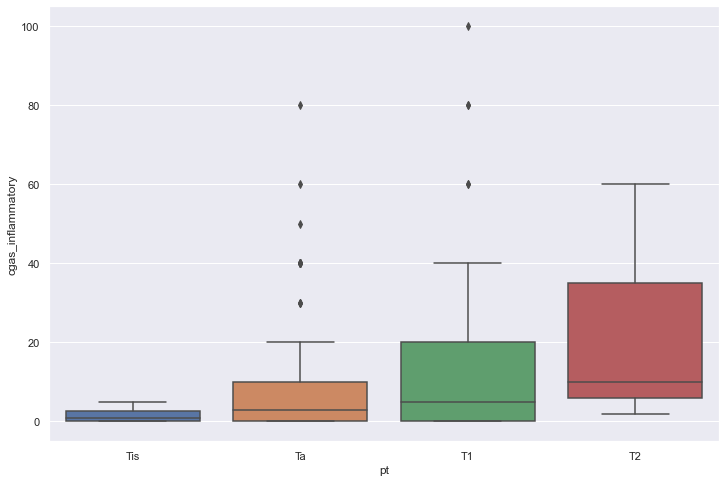

In [17]:
g = sns.boxplot(x='pt', y='cgas_inflammatory', data=df)

## pIRF3 in tumor cells

In [18]:
df.groupby('pt')['pirf3_tumor'].describe().round()

count  mean   std  min  25%  50%   75%    max
pt                                                
Tis    6.0   2.0   2.0  0.0  0.0  1.0   4.0    5.0
Ta   135.0  12.0  26.0  0.0  0.0  0.0   8.0  100.0
T1   111.0  13.0  24.0  0.0  0.0  0.0  10.0   80.0
T2    10.0   0.0   0.0  0.0  0.0  0.0   0.0    0.0

In [19]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['pirf3_tumor'].values for name, data in df.groupby('pt')], nan_policy='omit')[1]

0.13878519415477855

In [20]:
# Posthoc Dunn's test 
dunn = scikit_posthocs.posthoc_dunn([data['pirf3_tumor'].values for name, data in df.groupby('pt')])
pd.DataFrame(np.array(dunn), columns=levels, index=levels)

Ta       Tis        T1        T2
Ta   1.000000  0.997264  0.965048  0.426547
Tis  0.997264  1.000000  0.894842  0.208678
T1   0.965048  0.894842  1.000000  0.193864
T2   0.426547  0.208678  0.193864  1.000000

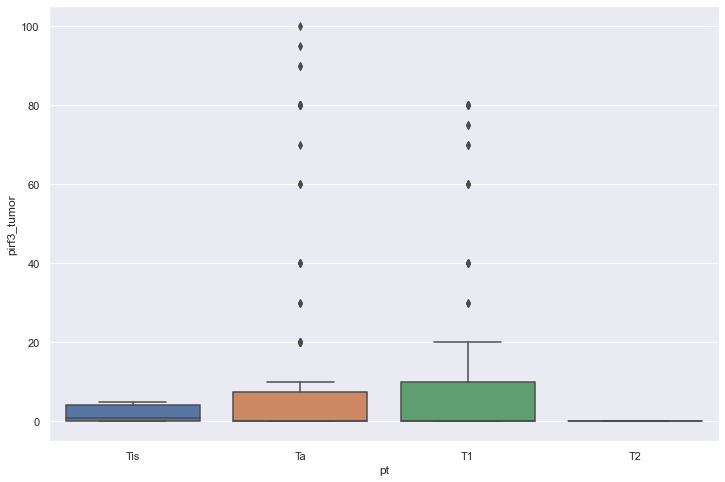

In [21]:
g = sns.boxplot(x='pt', y='pirf3_tumor', data=df)

## pIRF3 in peritumoral lymphocytes

In [22]:
df.groupby('pt')['pirf3_inflammatory'].describe().round()

count  mean   std  min  25%   50%   75%    max
pt                                                 
Tis    4.0  38.0  45.0  0.0  1.0  30.0  68.0   90.0
Ta    73.0  15.0  27.0  0.0  0.0   0.0  20.0  100.0
T1    69.0  12.0  26.0  0.0  0.0   0.0   5.0   90.0
T2     3.0  16.0  21.0  2.0  4.0   5.0  22.0   40.0

In [23]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['pirf3_inflammatory'].values for name, data in df.groupby('pt')], nan_policy='omit')[1]

0.10658685028473723

In [24]:
# Posthoc Dunn's test 
dunn = scikit_posthocs.posthoc_dunn([data['pirf3_inflammatory'].values for name, data in df.groupby('pt')])
pd.DataFrame(np.array(dunn), columns=levels, index=levels)

Ta       Tis        T1        T2
Ta   1.000000  0.718574  0.598010  0.962671
Tis  0.718574  1.000000  0.608041  0.707801
T1   0.598010  0.608041  1.000000  0.602789
T2   0.962671  0.707801  0.602789  1.000000

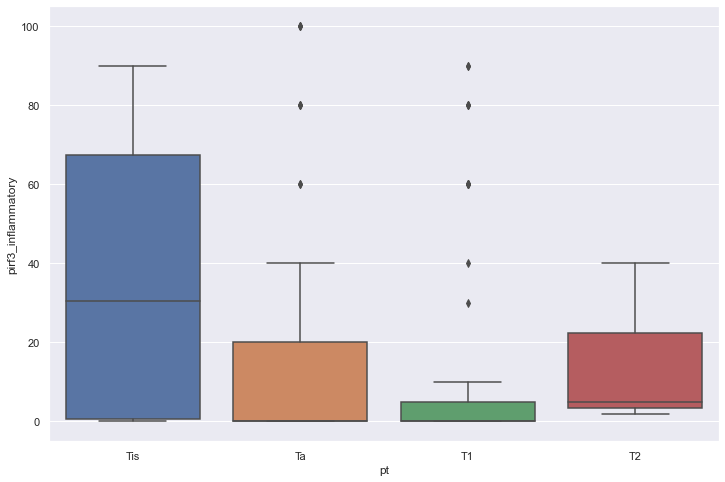

In [25]:
g = sns.boxplot(x='pt', y='pirf3_inflammatory', data=df)

# Marker expression by grade

## STING in tumor cells

In [26]:
df.groupby('grade')['sting_tumor'].describe().round()

count  mean   std  min  25%   50%   75%    max
grade                                                     
Low-grade    74.0  18.0  23.0  0.0  0.0  10.0  20.0   90.0
High-grade  112.0  24.0  35.0  0.0  0.0  10.0  30.0  100.0
Invasive     63.0  20.0  33.0  0.0  0.0   0.0  20.0  100.0

In [27]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['sting_tumor'].values for name, data in df.groupby('grade')], nan_policy='omit')[1]

0.3908389604604544

In [28]:
# Posthoc Dunn's test
levels = df['grade'].dropna().unique()
dunn = scikit_posthocs.posthoc_dunn([data['sting_tumor'].values for name, data in df.groupby('grade')])
pd.DataFrame(np.array(dunn), index=levels, columns=levels)

Low-grade  High-grade  Invasive
Low-grade    1.000000    0.725289  0.404672
High-grade   0.725289    1.000000  0.566780
Invasive     0.404672    0.566780  1.000000

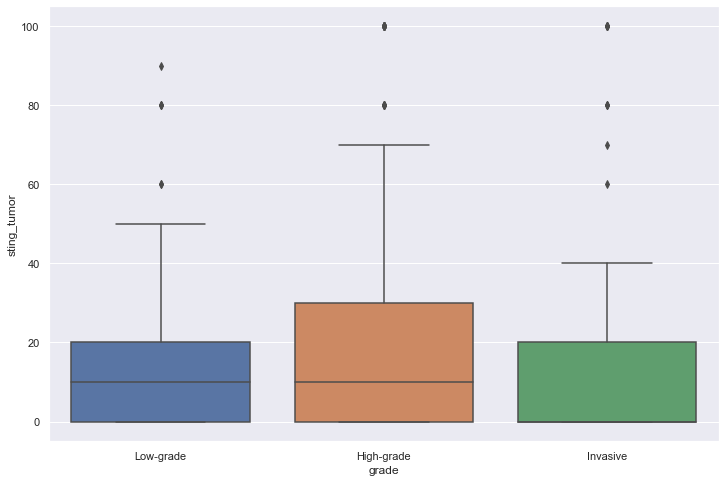

In [29]:
g = sns.boxplot(x='grade', y='sting_tumor', data=df)

## STING in peritumoral lymphocytes

In [30]:
df.groupby('grade')['sting_inflammatory'].describe().round()

count  mean  std   min    25%    50%    75%    max
grade                                                         
Low-grade    40.0  99.0  4.0  80.0  100.0  100.0  100.0  100.0
High-grade   60.0  96.0  8.0  80.0  100.0  100.0  100.0  100.0
Invasive     41.0  98.0  6.0  80.0  100.0  100.0  100.0  100.0

In [31]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['sting_inflammatory'].values for name, data in df.groupby('grade')], nan_policy='omit')[1]

0.0837750801265089

In [32]:
# Posthoc Dunn's test
dunn = scikit_posthocs.posthoc_dunn([data['sting_inflammatory'].values for name, data in df.groupby('grade')])
pd.DataFrame(np.array(dunn), index=levels, columns=levels)

Low-grade  High-grade  Invasive
Low-grade    1.000000    0.650573  0.931433
High-grade   0.650573    1.000000  0.717392
Invasive     0.931433    0.717392  1.000000

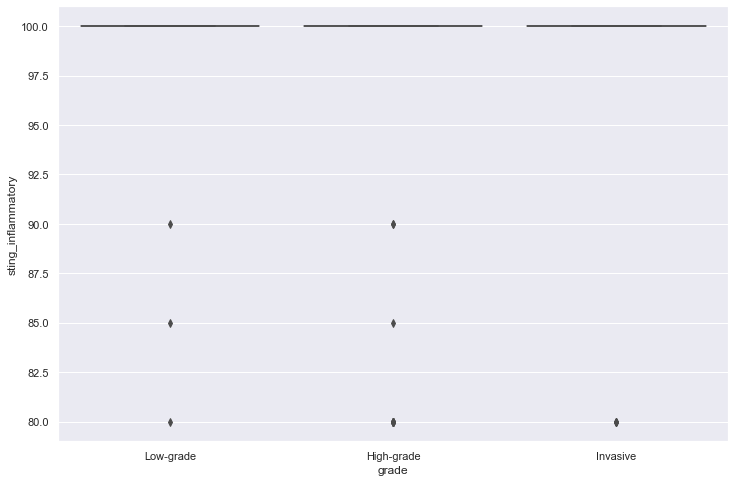

In [33]:
g = sns.boxplot(x='grade', y='sting_inflammatory', data=df)

## cGAS in tumor cells

In [34]:
df.groupby('grade')['cgas_tumor'].describe().round()

count  mean   std  min   25%   50%    75%    max
grade                                                       
Low-grade    74.0  66.0  38.0  0.0  32.0  90.0  100.0  100.0
High-grade  111.0  62.0  40.0  0.0  15.0  80.0  100.0  100.0
Invasive     63.0  64.0  40.0  0.0  20.0  80.0  100.0  100.0

In [35]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['cgas_tumor'].values for name, data in df.groupby('grade')], nan_policy='omit')[1]

0.6638019242102602

In [36]:
# Posthoc Dunn's test
dunn = scikit_posthocs.posthoc_dunn([data['cgas_tumor'].values for name, data in df.groupby('grade')])
pd.DataFrame(np.array(dunn), index=levels, columns=levels)

Low-grade  High-grade  Invasive
Low-grade    1.000000    0.635592  0.994406
High-grade   0.635592    1.000000  0.646620
Invasive     0.994406    0.646620  1.000000

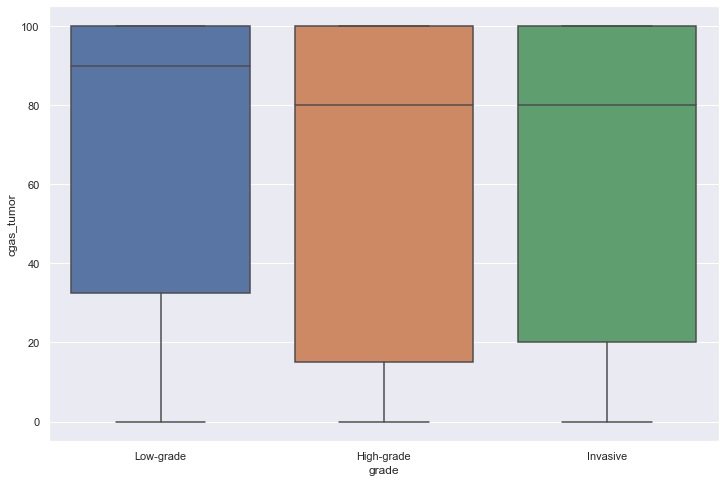

In [37]:
g = sns.boxplot(x='grade', y='cgas_tumor', data=df)

## cGAS in peritumoral lymphocytes

In [38]:
df.groupby('grade')['cgas_inflammatory'].describe().round()

count  mean   std  min  25%   50%   75%    max
grade                                                     
Low-grade    40.0   9.0  14.0  0.0  0.0   4.0  10.0   50.0
High-grade   60.0  13.0  20.0  0.0  0.0   5.0  20.0   80.0
Invasive     41.0  15.0  23.0  0.0  0.0  10.0  20.0  100.0

In [39]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['cgas_inflammatory'].values for name, data in df.groupby('grade')], nan_policy='omit')[1]

0.4994583781886013

In [40]:
# Posthoc Dunn's test
dunn = scikit_posthocs.posthoc_dunn([data['cgas_inflammatory'].values for name, data in df.groupby('grade')])
pd.DataFrame(np.array(dunn), index=levels, columns=levels)

Low-grade  High-grade  Invasive
Low-grade    1.000000    0.797822  0.680874
High-grade   0.797822    1.000000  0.846944
Invasive     0.680874    0.846944  1.000000

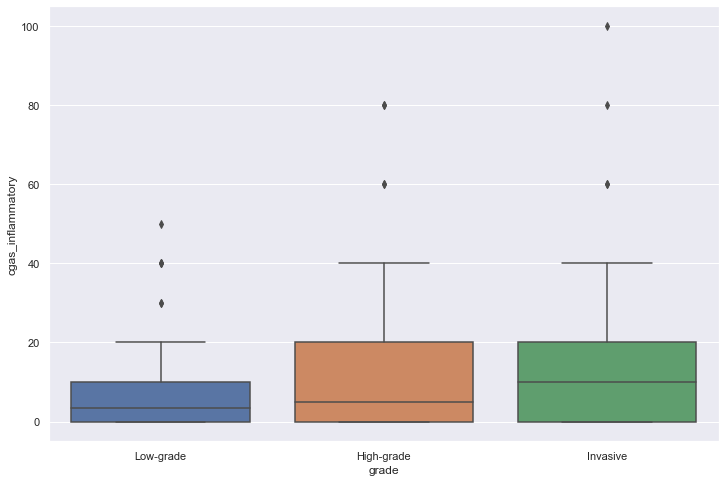

In [41]:
g = sns.boxplot(x='grade', y='cgas_inflammatory', data=df)

## pIRF3 in tumor cells

In [42]:
df.groupby('grade')['pirf3_tumor'].describe().round()

count  mean   std  min  25%  50%   75%    max
grade                                                    
Low-grade    74.0  11.0  24.0  0.0  0.0  0.0   5.0  100.0
High-grade  112.0  13.0  26.0  0.0  0.0  0.0  10.0   95.0
Invasive     63.0  11.0  23.0  0.0  0.0  0.0   8.0   80.0

In [43]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['pirf3_tumor'].values for name, data in df.groupby('grade')], nan_policy='omit')[1]

0.7694735922577323

In [44]:
dunn = scikit_posthocs.posthoc_dunn([data['pirf3_tumor'].values for name, data in df.groupby('grade')])
pd.DataFrame(np.array(dunn), index=levels, columns=levels)

Low-grade  High-grade  Invasive
Low-grade    1.000000    0.688388  0.880036
High-grade   0.688388    1.000000  0.828047
Invasive     0.880036    0.828047  1.000000

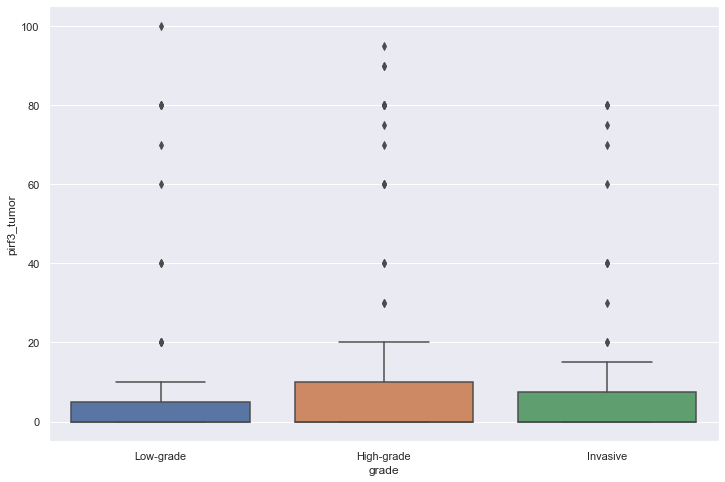

In [45]:
g = sns.boxplot(x='grade', y='pirf3_tumor', data=df)

## pIRF3 in peritumoral lymphocytes

In [46]:
df.groupby('grade')['pirf3_inflammatory'].describe().round()

count  mean   std  min  25%  50%   75%    max
grade                                                    
Low-grade    40.0   9.0  18.0  0.0  0.0  0.0  10.0   80.0
High-grade   60.0  20.0  31.0  0.0  0.0  2.0  30.0  100.0
Invasive     41.0  10.0  24.0  0.0  0.0  0.0   5.0   90.0

In [47]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['pirf3_inflammatory'].values for name, data in df.groupby('grade')], nan_policy='omit')[1]

0.021150731550050702

In [48]:
dunn = scikit_posthocs.posthoc_dunn([data['pirf3_inflammatory'].values for name, data in df.groupby('grade')])
pd.DataFrame(np.array(dunn), index=levels, columns=levels)

Low-grade  High-grade  Invasive
Low-grade    1.000000    0.464062  0.956008
High-grade   0.464062    1.000000  0.424816
Invasive     0.956008    0.424816  1.000000

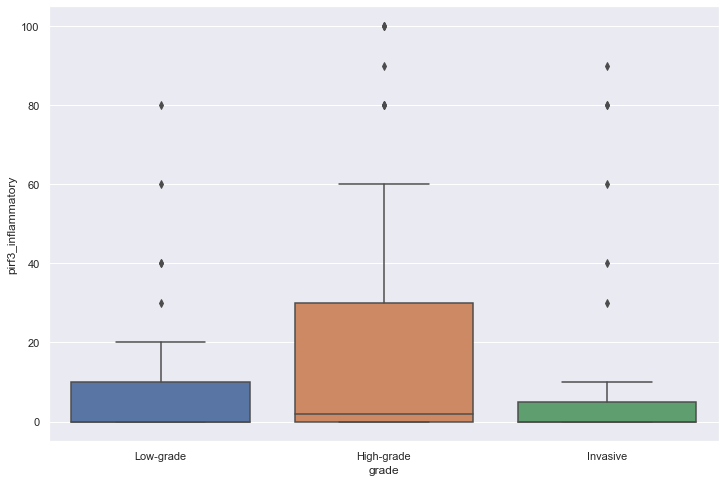

In [49]:
g = sns.boxplot(x='grade', y='pirf3_inflammatory', data=df)

# Marker expression and outcome
Marker expression was summarized using the median value across all TMA spots corresponding to the pathology case. Only spots with tumor (either low-grade, high-grade or invasive UC) were included.

In [50]:
# Removing spots with non-tumor and CIS
df_tumor = df.query('lesion != "Non-tumor" & lesion != "CIS"')
df_tumor['lesion'].value_counts().to_frame()

lesion
High-grade     168
Low-grade      116
Invasive       108

## STING in tumor cells

In [51]:
marker = 'sting_tumor'

### Recurrence at next biopsy

In [52]:
outcome = 'recurrence_next'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min  25%   50%    75%    max
recurrence_next                                                           
No                25.0  28.400000  35.347089  0.0  5.0  10.0  40.00  100.0
Yes               52.0  20.576923  29.366745  0.0  0.0  10.0  31.25  100.0

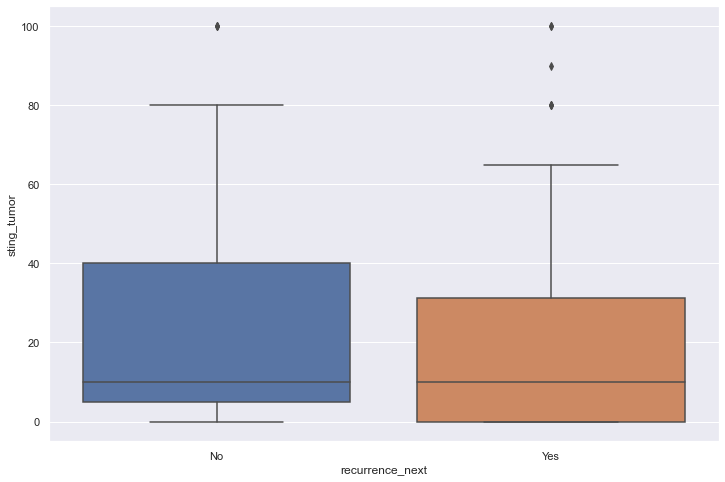

In [53]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median)

In [54]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.04300343157684894


### Recurrence at any biopsy

In [55]:
outcome = 'recurrence_any'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min  25%   50%   75%    max
recurrence_any                                                          
No                7.0  40.000000  45.916591  0.0  2.5  15.0  80.0  100.0
Yes              81.0  19.320988  28.059681  0.0  0.0  10.0  20.0  100.0

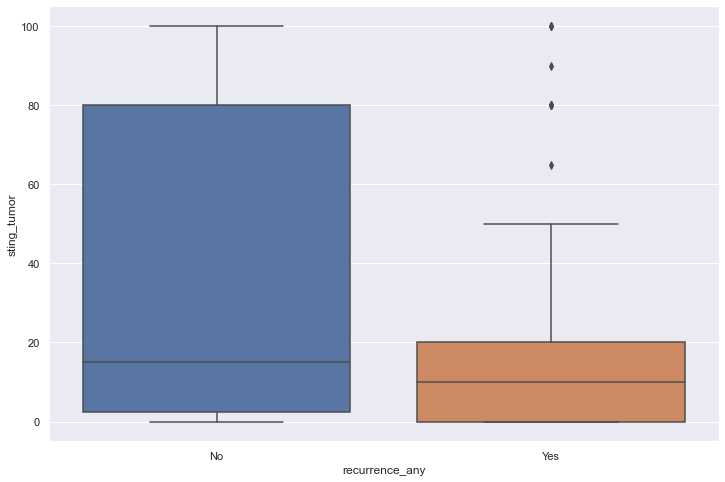

In [56]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [57]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.48455804488774945


### Grade progression at next biopsy

In [58]:
outcome = 'progression_grade_next'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std   min    25%   50%    75%  \
progression_grade_next                                                          
No                       78.0  22.371795  31.393237   0.0   0.00  10.0  30.00   
Yes                       2.0  22.500000  17.677670  10.0  16.25  22.5  28.75   

                          max  
progression_grade_next         
No                      100.0  
Yes                      35.0

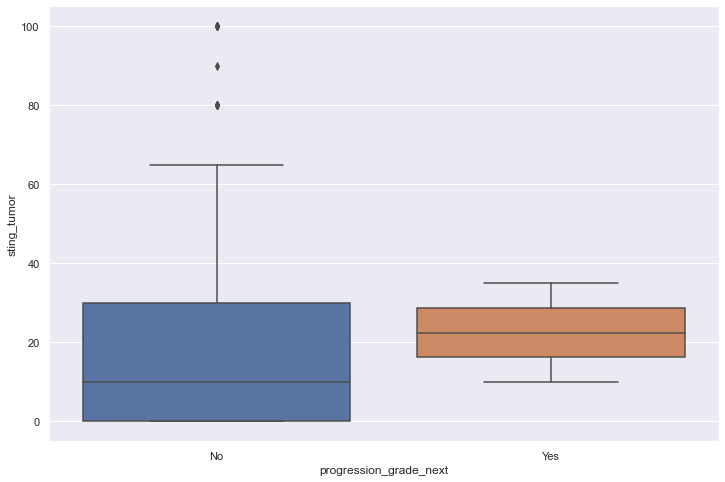

In [59]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [60]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.03810921111460939


### Grade progression at any biopsy

In [61]:
outcome = 'progression_grade_any'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count     mean        std  min  25%   50%    75%    max
progression_grade_any                                                         
No                      80.0  21.9375  31.062348  0.0  0.0  10.0  30.00  100.0
Yes                      8.0  11.2500  13.822859  0.0  0.0   5.0  21.25   35.0

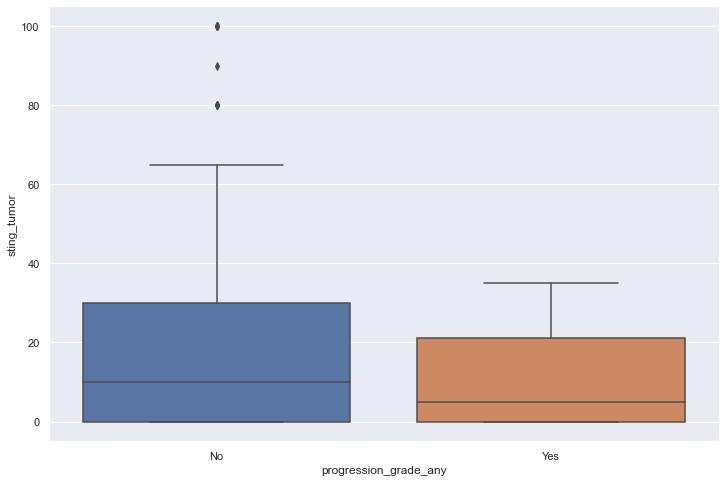

In [62]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [63]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.30773042236141057


### Stage progression at next biopsy

In [64]:
outcome = 'progression_stage_next'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min  25%   50%   75%  \
progression_stage_next                                                      
No                       75.0  22.533333  30.351247  0.0  0.0  10.0  32.5   
Yes                       3.0  33.333333  57.735027  0.0  0.0   0.0  50.0   

                          max  
progression_stage_next         
No                      100.0  
Yes                     100.0

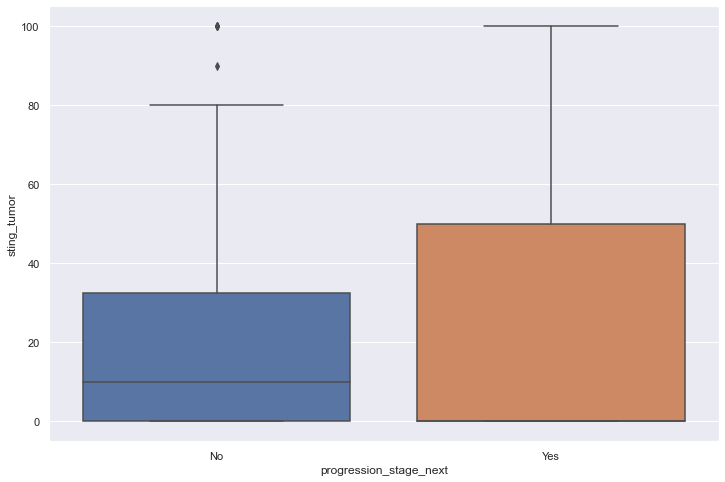

In [65]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [66]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.4463571398028778


### Stage progression at any biopsy

In [67]:
outcome = 'progression_stage_any'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min  25%   50%   75%  \
progression_stage_any                                                      
No                      77.0  20.714286  29.230417  0.0  0.0  10.0  30.0   
Yes                     11.0  22.727273  36.630836  0.0  0.0  10.0  20.0   

                         max  
progression_stage_any         
No                     100.0  
Yes                    100.0

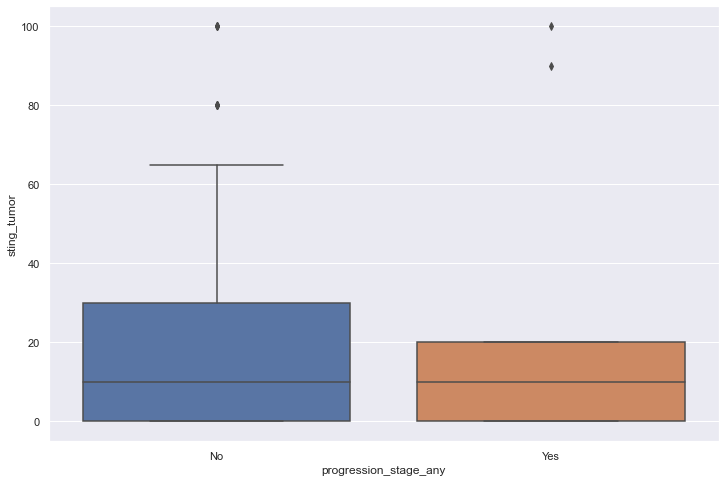

In [68]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [69]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.40366739997912193


## STING in peritumoral lymphocytes

In [70]:
marker = 'sting_inflammatory'

### Recurrence at next biopsy

In [71]:
outcome = 'recurrence_next'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean       std   min    25%    50%    75%    max
recurrence_next                                                              
No                19.0  97.894737  5.353034  80.0  100.0  100.0  100.0  100.0
Yes               37.0  97.635135  5.771877  80.0  100.0  100.0  100.0  100.0

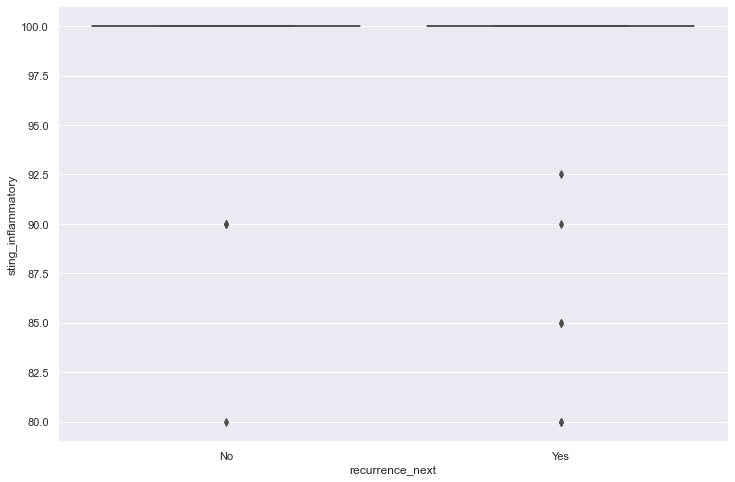

In [72]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median)

In [73]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.3228081205425948


### Recurrence at any biopsy

In [74]:
outcome = 'recurrence_any'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean       std   min    25%    50%    75%    max
recurrence_any                                                              
No                7.0  98.571429  3.779645  90.0  100.0  100.0  100.0  100.0
Yes              58.0  97.629310  5.894214  80.0  100.0  100.0  100.0  100.0

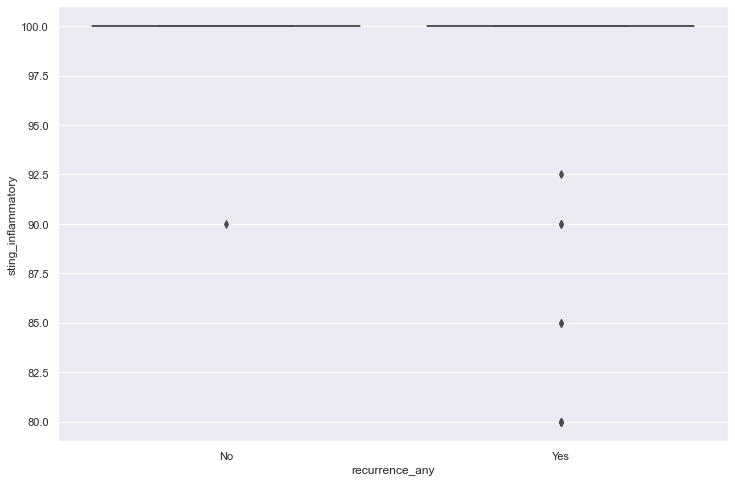

In [75]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [76]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.05780634106020917


### Grade progression at next biopsy

In [77]:
outcome = 'progression_grade_next'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count        mean       std    min    25%    50%  \
progression_grade_next                                                     
No                       57.0   97.412281  6.012727   80.0  100.0  100.0   
Yes                       2.0  100.000000  0.000000  100.0  100.0  100.0   

                          75%    max  
progression_grade_next                
No                      100.0  100.0  
Yes                     100.0  100.0

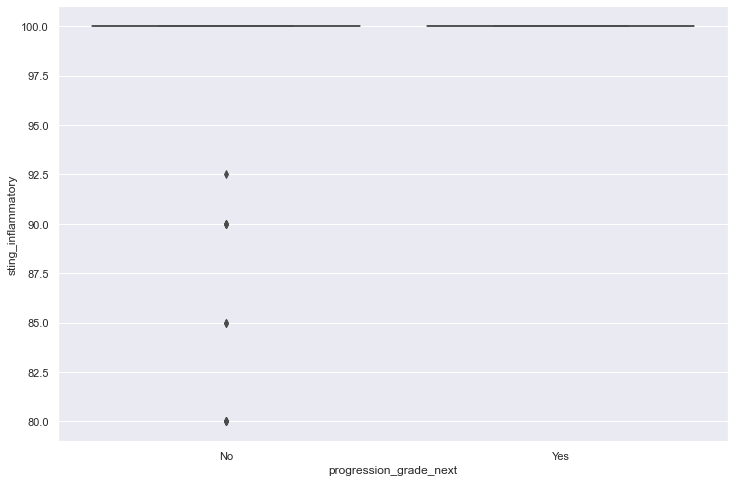

In [78]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [79]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.2816014453758831


### Grade progression at any biopsy

In [80]:
outcome = 'progression_grade_any'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count   mean       std    min    25%    50%    75%  \
progression_grade_any                                                       
No                      59.0   97.5  5.926998   80.0  100.0  100.0  100.0   
Yes                      6.0  100.0  0.000000  100.0  100.0  100.0  100.0   

                         max  
progression_grade_any         
No                     100.0  
Yes                    100.0

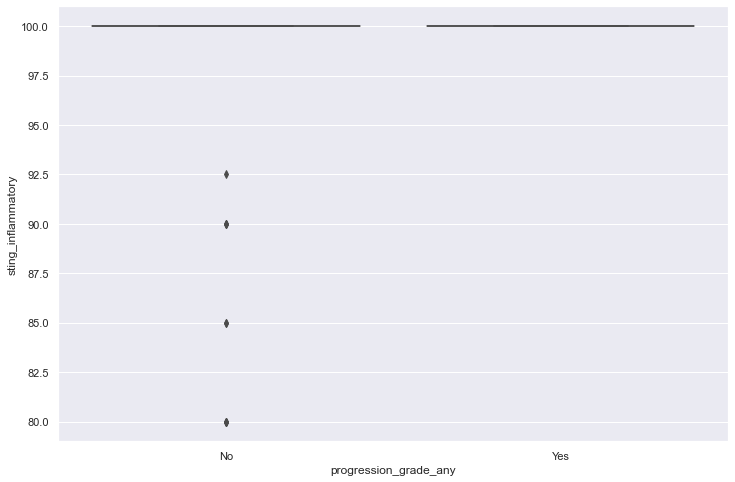

In [81]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [82]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.4563362103902963


### Stage progression at next biopsy

In [83]:
outcome = 'progression_stage_next'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count        mean       std    min    25%    50%  \
progression_stage_next                                                     
No                       56.0   97.723214  5.585631   80.0  100.0  100.0   
Yes                       1.0  100.000000       NaN  100.0  100.0  100.0   

                          75%    max  
progression_stage_next                
No                      100.0  100.0  
Yes                     100.0  100.0

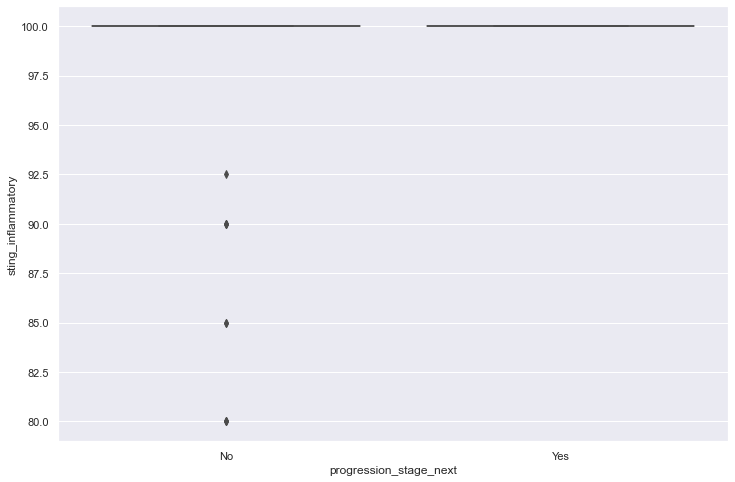

In [84]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [85]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.04710445091944092


### Stage progression at any biopsy

In [86]:
outcome = 'progression_stage_any'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean       std   min    25%    50%    75%  \
progression_stage_any                                                          
No                      59.0  97.754237  5.698890  80.0  100.0  100.0  100.0   
Yes                      6.0  97.500000  6.123724  85.0  100.0  100.0  100.0   

                         max  
progression_stage_any         
No                     100.0  
Yes                    100.0

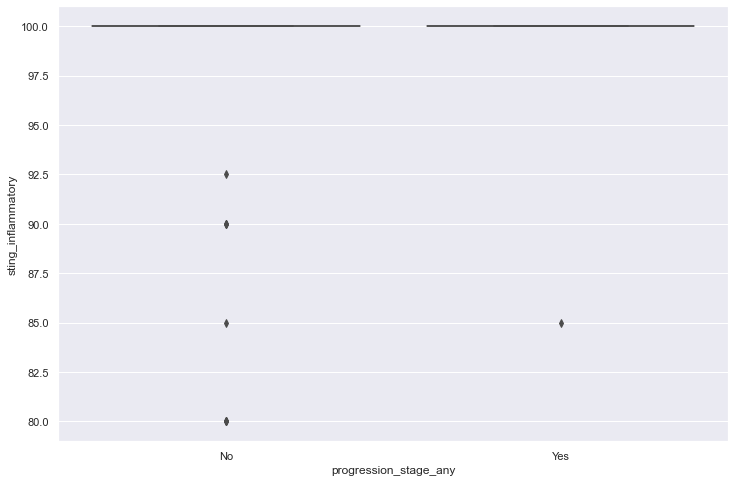

In [87]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [88]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.222921570729808


## cGAS in tumor cells

In [89]:
marker = 'cgas_tumor'

### Recurrence at next biopsy

In [90]:
outcome = 'recurrence_next'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min   25%   50%    75%    max
recurrence_next                                                            
No                25.0  64.600000  39.684170  0.0  30.0  80.0  100.0  100.0
Yes               52.0  66.923077  36.637518  0.0  40.0  82.5  100.0  100.0

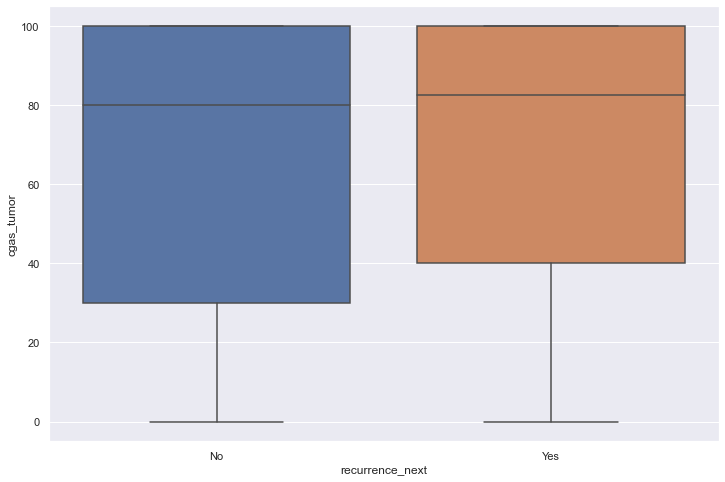

In [91]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median)

In [92]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.23609860678617312


### Recurrence at any biopsy

In [93]:
outcome = 'recurrence_any'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min   25%   50%    75%    max
recurrence_any                                                            
No                7.0  63.571429  45.708705  0.0  30.0  85.0  100.0  100.0
Yes              81.0  65.123457  37.632892  0.0  30.0  80.0  100.0  100.0

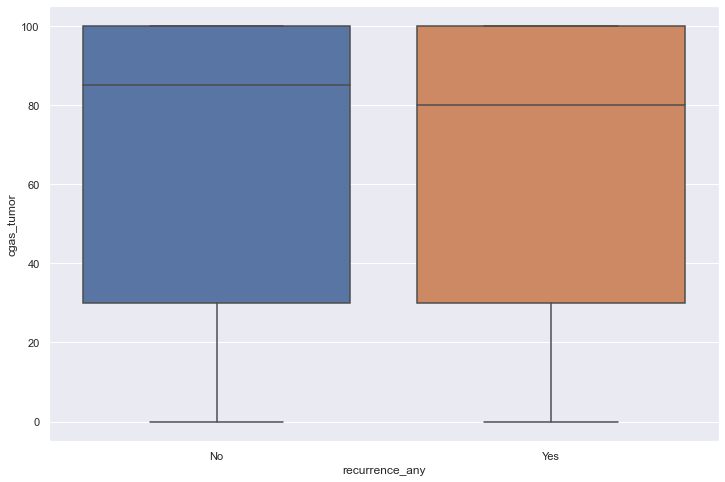

In [94]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [95]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.24088391707581275


### Grade progression at next biopsy

In [96]:
outcome = 'progression_grade_next'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std   min    25%   50%  \
progression_grade_next                                                   
No                       78.0  64.551282  38.352313   0.0  30.00  80.0   
Yes                       2.0  87.500000   3.535534  85.0  86.25  87.5   

                           75%    max  
progression_grade_next                 
No                      100.00  100.0  
Yes                      88.75   90.0

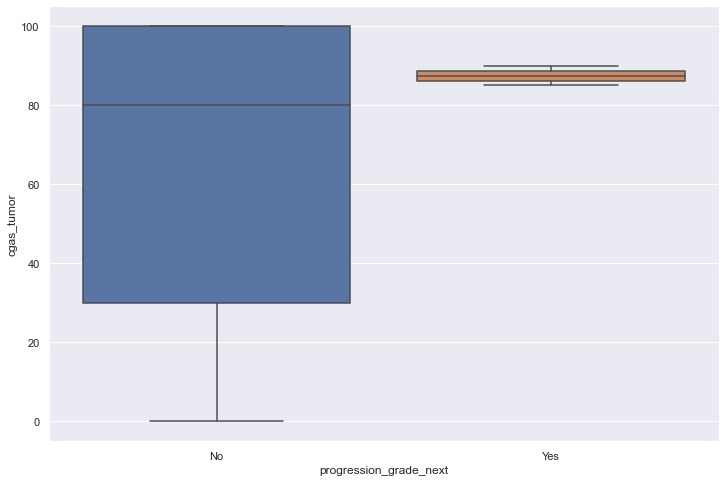

In [97]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [98]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.06950224435676228


### Grade progression at any biopsy

In [99]:
outcome = 'progression_grade_any'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count     mean        std  min   25%   50%     75%  \
progression_grade_any                                                       
No                      80.0  65.6875  38.432447  0.0  30.0  82.5  100.00   
Yes                      8.0  58.1250  35.349025  5.0  35.0  62.5   86.25   

                         max  
progression_grade_any         
No                     100.0  
Yes                    100.0

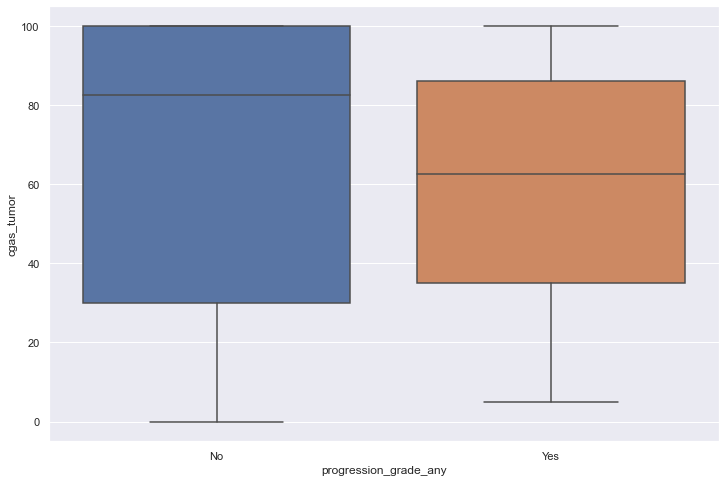

In [100]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [101]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.2543989021346436


### Stage progression at next biopsy

In [102]:
outcome = 'progression_stage_next'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std   min   25%   50%    75%  \
progression_stage_next                                                         
No                       75.0  67.133333  37.391043   0.0  40.0  85.0  100.0   
Yes                       3.0  53.333333  41.633320  20.0  30.0  40.0   70.0   

                          max  
progression_stage_next         
No                      100.0  
Yes                     100.0

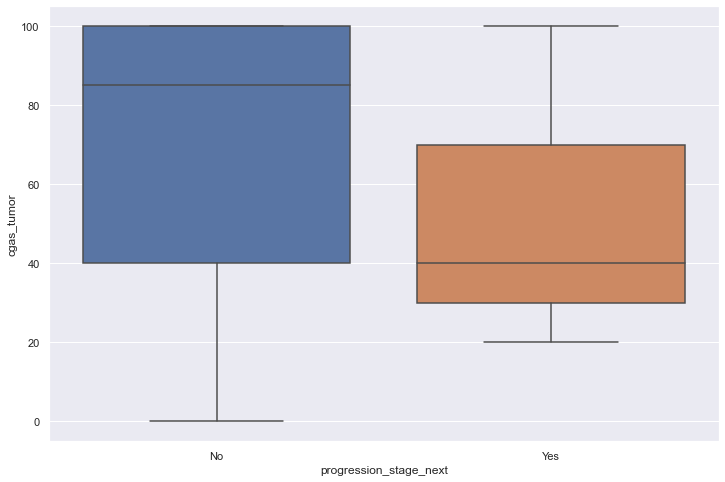

In [103]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [104]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.4590764498788759


### Stage progression at any biopsy

In [105]:
outcome = 'progression_stage_any'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min   25%   50%    75%  \
progression_stage_any                                                        
No                      77.0  66.558442  36.994485  0.0  40.0  80.0  100.0   
Yes                     11.0  54.090909  45.100897  0.0  15.0  40.0  100.0   

                         max  
progression_stage_any         
No                     100.0  
Yes                    100.0

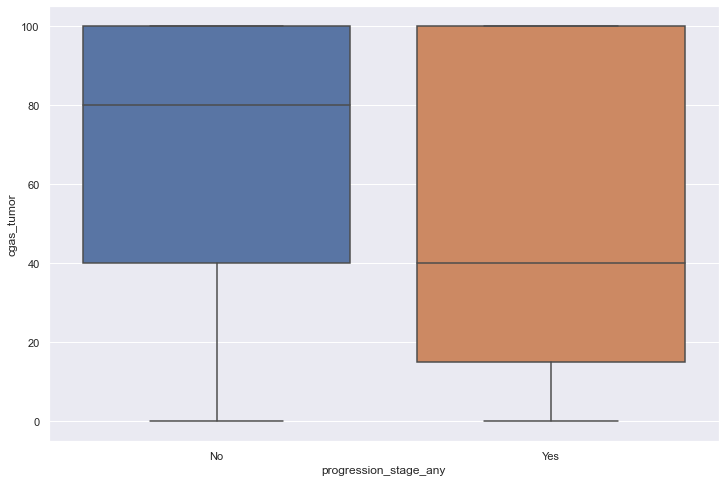

In [106]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [107]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.46460114177412004


## cGAS in peritumoral lymphocytes

In [108]:
marker = 'cgas_inflammatory'

### Recurrence at next biopsy

In [109]:
outcome = 'recurrence_next'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min   25%  50%   75%   max
recurrence_next                                                         
No                19.0  11.526316  16.949659  0.0  0.25  5.0  10.0  60.0
Yes               37.0   8.297297  11.114592  0.0  0.00  5.0  10.0  40.0

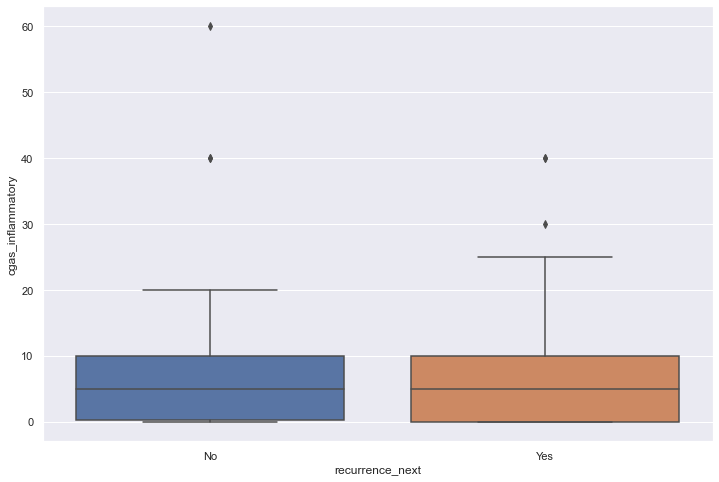

In [110]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median)

In [111]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.2867150472674126


### Recurrence at any biopsy

In [112]:
outcome = 'recurrence_any'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min  25%  50%   75%   max
recurrence_any                                                        
No                7.0  10.285714  13.698714  0.5  2.0  7.5  10.0  40.0
Yes              58.0   9.974138  13.303944  0.0  0.0  5.0  15.0  60.0

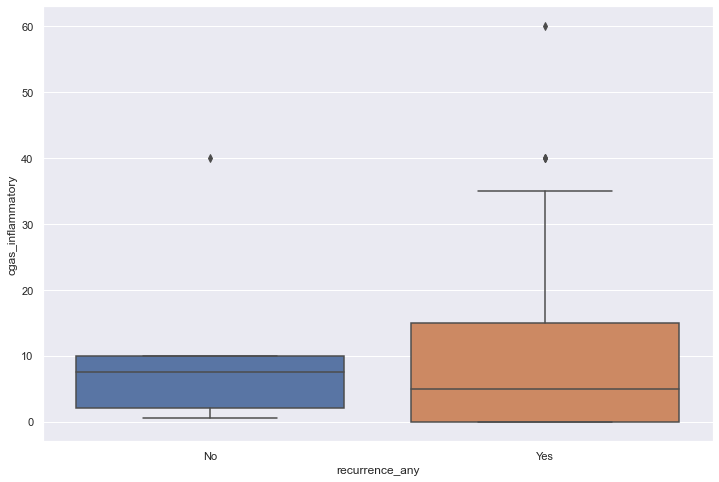

In [113]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [114]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.11430722576632968


### Grade progression at next biopsy

In [115]:
outcome = 'progression_grade_next'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min  25%  50%   75%   max
progression_grade_next                                                        
No                       57.0  10.105263  13.574772  0.0  0.0  5.0  15.0  60.0
Yes                       2.0   0.000000   0.000000  0.0  0.0  0.0   0.0   0.0

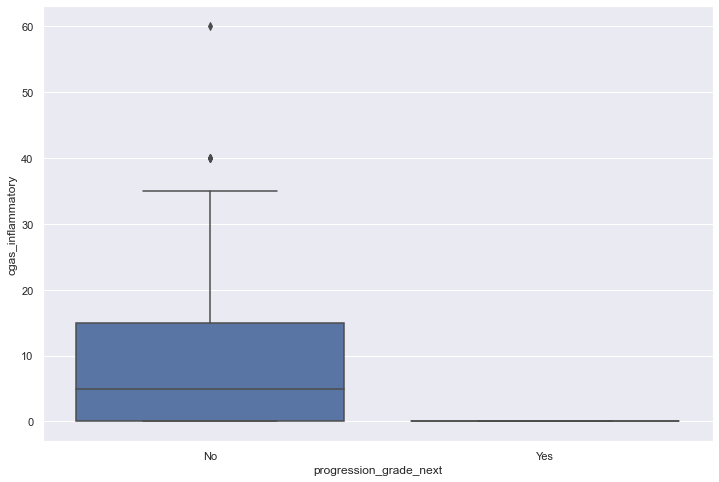

In [116]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [117]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.4939063393441108


### Grade progression at any biopsy

In [118]:
outcome = 'progression_grade_any'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min  25%   50%     75%  \
progression_grade_any                                                        
No                      59.0  10.169492  13.305628  0.0  0.0  5.00  15.000   
Yes                      6.0   8.416667  13.639709  0.0  0.0  2.75   8.875   

                        max  
progression_grade_any        
No                     60.0  
Yes                    35.0

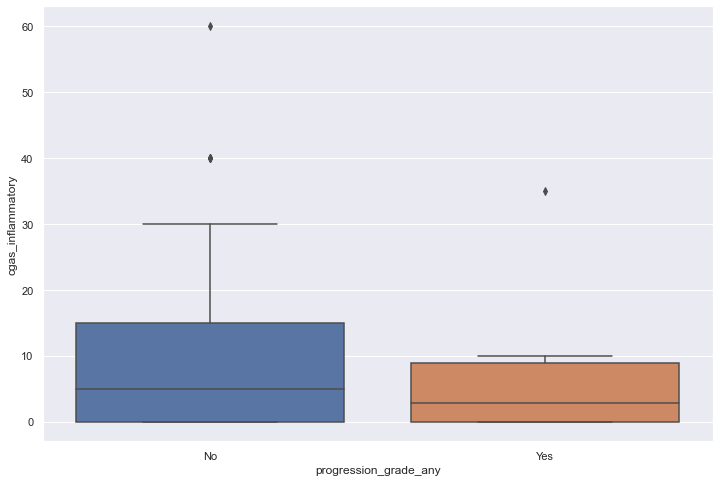

In [119]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [120]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.3163094540883294


### Stage progression at next biopsy

In [121]:
outcome = 'progression_stage_next'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std   min   25%   50%   75%  \
progression_stage_next                                                        
No                       56.0   9.616071  13.512954   0.0   0.0   5.0  10.0   
Yes                       1.0  15.000000        NaN  15.0  15.0  15.0  15.0   

                         max  
progression_stage_next        
No                      60.0  
Yes                     15.0

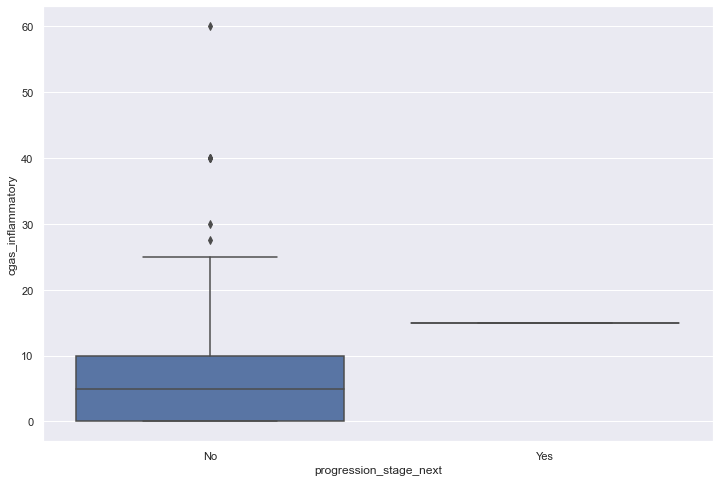

In [122]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [123]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.03518238215973087


### Stage progression at any biopsy

In [124]:
outcome = 'progression_stage_any'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min   25%  50%    75%  \
progression_stage_any                                                       
No                      59.0   9.889831  13.374921  0.0  0.00  5.0  12.50   
Yes                      6.0  11.166667  12.890565  0.0  2.75  7.5  13.75   

                        max  
progression_stage_any        
No                     60.0  
Yes                    35.0

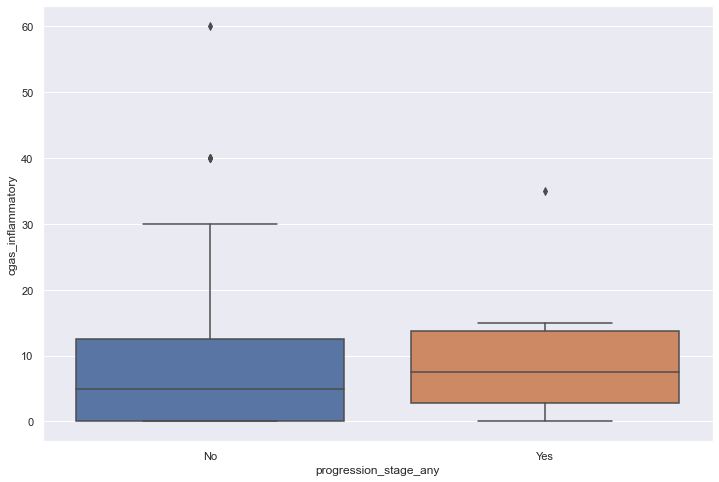

In [125]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [126]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.08703625284878808


## pIRF3 in tumor cells

In [127]:
marker = 'pirf3_tumor'

### Recurrence at next biopsy

In [128]:
outcome = 'recurrence_next'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min  25%  50%     75%    max
recurrence_next                                                           
No                25.0   9.480000  22.759833  0.0  0.0  0.0   5.000   80.0
Yes               52.0  17.230769  30.328990  0.0  0.0  0.0  16.875  100.0

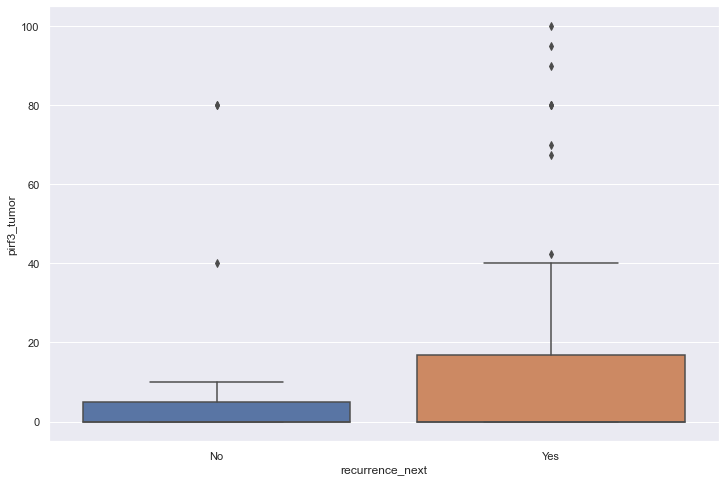

In [129]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median)

In [130]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.4644773088921913


### Recurrence at any biopsy

In [131]:
outcome = 'recurrence_any'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min  25%  50%  75%    max
recurrence_any                                                        
No                7.0   1.714286   3.728909  0.0  0.0  0.0  1.0   10.0
Yes              81.0  14.141975  27.610373  0.0  0.0  0.0  7.5  100.0

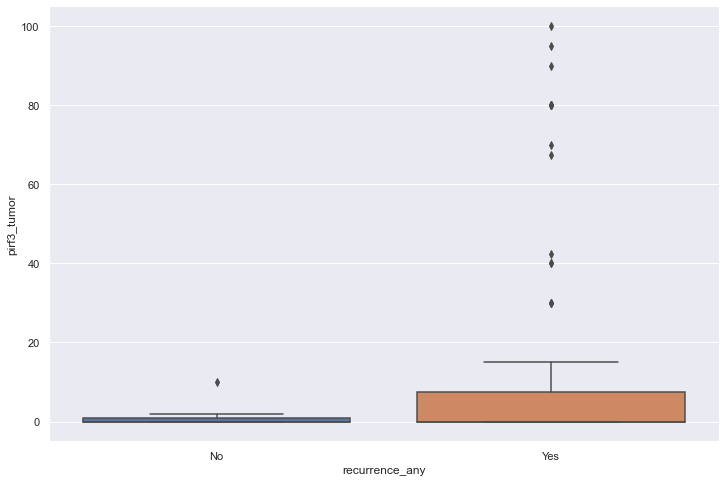

In [132]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [133]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.0860537012722023


### Grade progression at next biopsy

In [134]:
outcome = 'progression_grade_next'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min    25%   50%     75%  \
progression_grade_next                                                          
No                       78.0  14.076923  28.064985  0.0   0.00   0.0   6.875   
Yes                       2.0  17.500000  17.677670  5.0  11.25  17.5  23.750   

                          max  
progression_grade_next         
No                      100.0  
Yes                      30.0

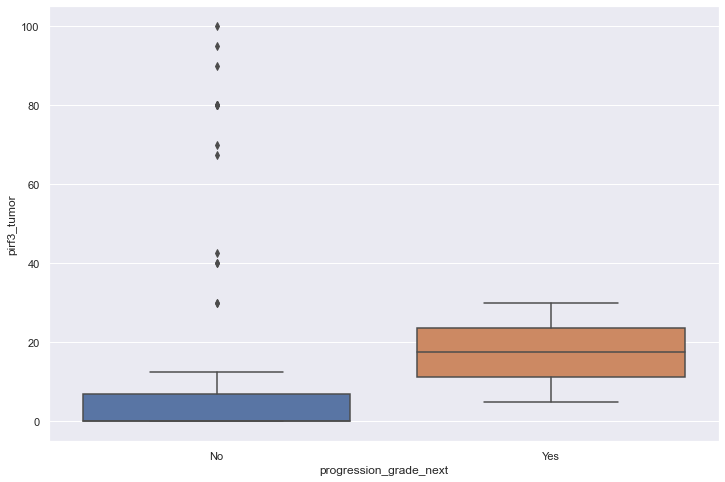

In [135]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [136]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.022693093229919175


### Grade progression at any biopsy

In [137]:
outcome = 'progression_grade_any'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count      mean        std  min  25%  50%    75%    max
progression_grade_any                                                         
No                      80.0  13.94375  27.737923  0.0  0.0  0.0  8.125  100.0
Yes                      8.0   5.25000  10.236489  0.0  0.0  1.0  5.000   30.0

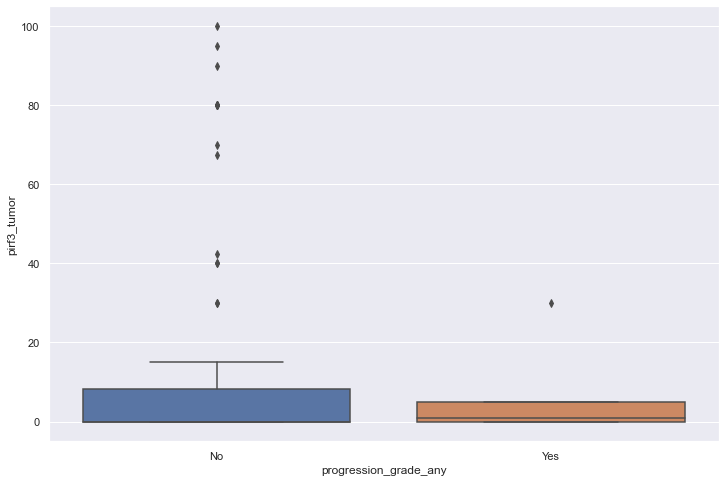

In [138]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [139]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.48226392463573076


### Stage progression at next biopsy

In [140]:
outcome = 'progression_stage_next'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std   min   25%   50%   75%  \
progression_stage_next                                                        
No                       75.0  12.773333  26.192671   0.0   0.0   0.0   5.0   
Yes                       3.0  58.333333  43.684475  10.0  40.0  70.0  82.5   

                          max  
progression_stage_next         
No                      100.0  
Yes                      95.0

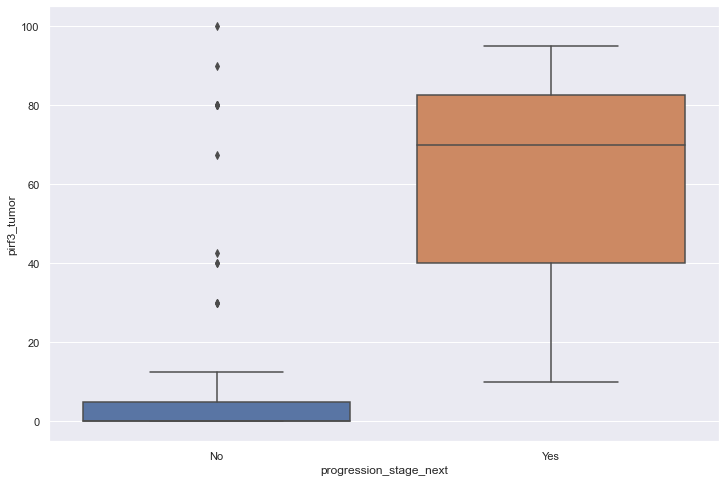

In [141]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [142]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.034472143968678176


### Stage progression at any biopsy

In [143]:
outcome = 'progression_stage_any'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min  25%   50%    75%  \
progression_stage_any                                                       
No                      77.0  11.266234  25.093062  0.0  0.0   0.0   5.00   
Yes                     11.0  26.363636  34.665610  0.0  0.0  10.0  48.75   

                         max  
progression_stage_any         
No                     100.0  
Yes                     95.0

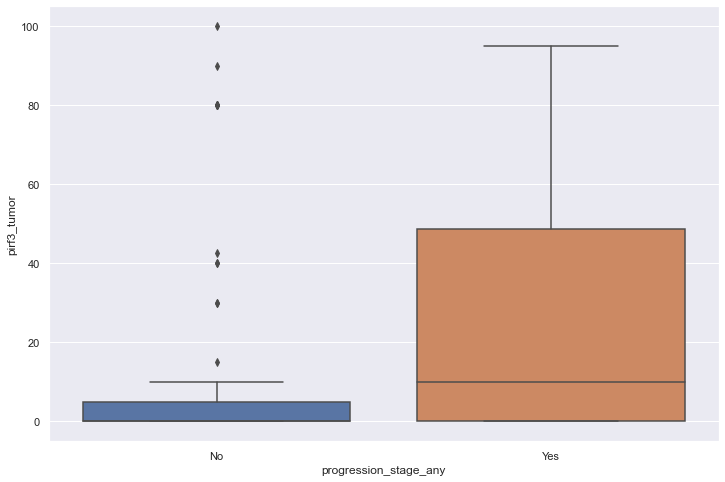

In [144]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [145]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.060164863408797536


## pIRF3 in peritumoral lymphocytes

In [146]:
marker = 'pirf3_inflammatory'

### Recurrence at next biopsy

In [147]:
outcome = 'recurrence_next'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min  25%  50%   75%    max
recurrence_next                                                         
No                19.0  16.894737  30.575762  0.0  0.0  0.0  17.5  100.0
Yes               37.0  12.351351  23.676601  0.0  0.0  0.0   5.0   80.0

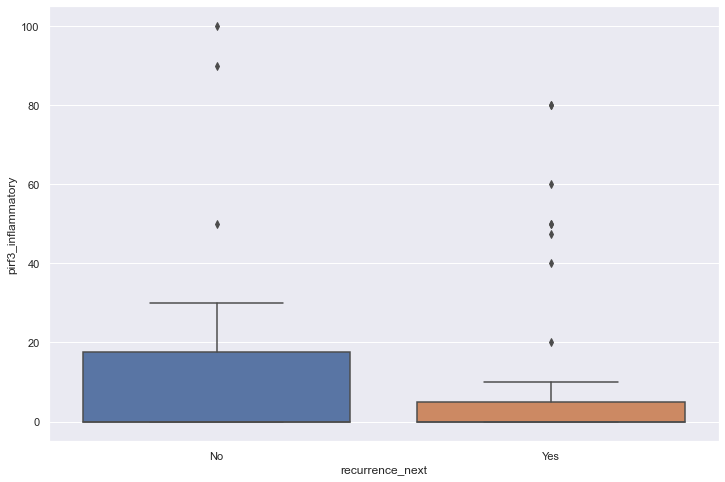

In [148]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median)

In [149]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.31486494474339033


### Recurrence at any biopsy

In [150]:
outcome = 'recurrence_any'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min  25%  50%    75%    max
recurrence_any                                                          
No                7.0   0.857143   1.864454  0.0  0.0  0.0   0.50    5.0
Yes              58.0  14.724138  25.838767  0.0  0.0  1.5  18.75  100.0

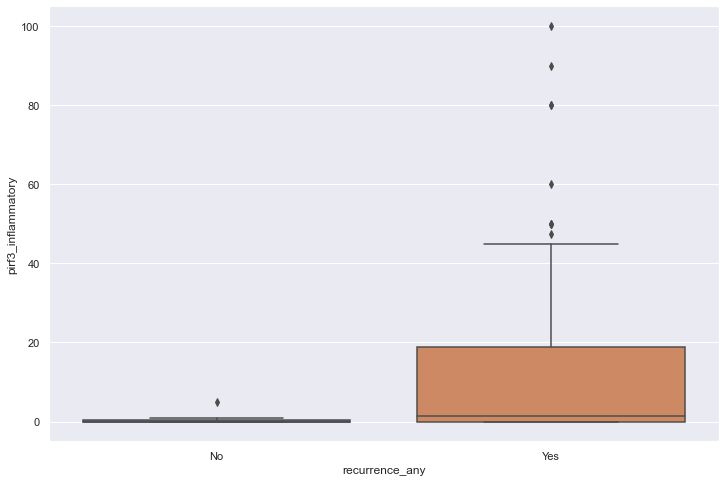

In [151]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [152]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.011085673226128717


### Grade progression at next biopsy

In [153]:
outcome = 'progression_grade_next'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min  25%  50%   75%  \
progression_grade_next                                                     
No                       57.0  14.140351  25.774045  0.0  0.0  0.0  15.0   
Yes                       2.0   0.000000   0.000000  0.0  0.0  0.0   0.0   

                          max  
progression_grade_next         
No                      100.0  
Yes                       0.0

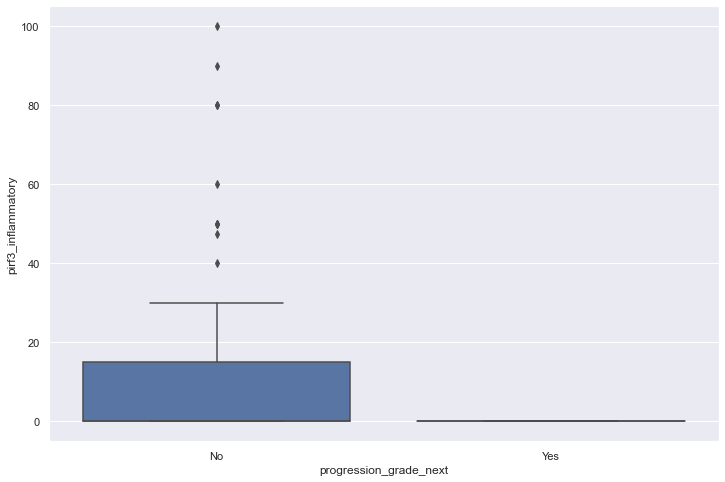

In [154]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [155]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.4388026654690712


### Grade progression at any biopsy

In [156]:
outcome = 'progression_grade_any'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min  25%  50%   75%    max
progression_grade_any                                                         
No                      59.0  14.161017  25.701946  0.0  0.0  1.0  12.5  100.0
Yes                      6.0   4.083333   9.057686  0.0  0.0  0.0   1.5   22.5

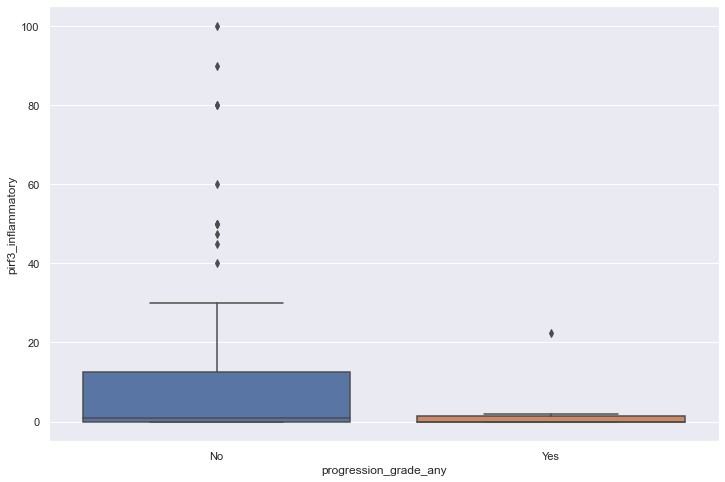

In [157]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [158]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.26771569334442497


### Stage progression at next biopsy

In [159]:
outcome = 'progression_stage_next'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min  25%  50%    75%  \
progression_stage_next                                                      
No                       56.0  14.651786  26.310544  0.0  0.0  0.0  16.25   
Yes                       1.0   2.500000        NaN  2.5  2.5  2.5   2.50   

                          max  
progression_stage_next         
No                      100.0  
Yes                       2.5

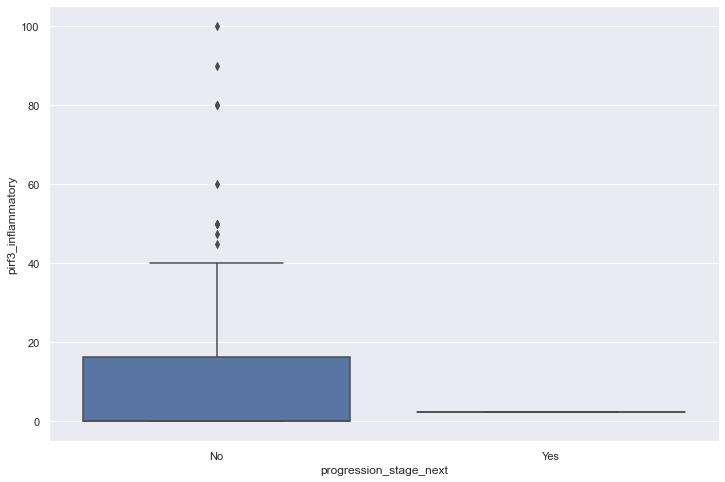

In [160]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [161]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.043826708418470424


### Stage progression at any biopsy

In [162]:
outcome = 'progression_stage_any'
marker_median = df_tumor.groupby(['sp',outcome])[marker].median().reset_index()
marker_median.groupby(outcome)[marker].describe()

count       mean        std  min  25%   50%   75%  \
progression_stage_any                                                      
No                      59.0  13.237288  25.358525  0.0  0.0  0.00  10.0   
Yes                      6.0  13.166667  19.901424  0.0  2.0  2.25  17.5   

                         max  
progression_stage_any         
No                     100.0  
Yes                     50.0

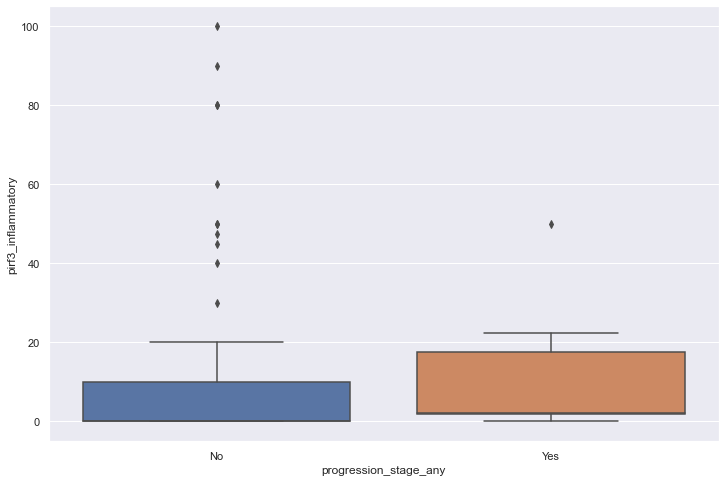

In [163]:
g = sns.boxplot(x=outcome, y=marker, data=marker_median, order=['No','Yes'])

In [164]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in marker_median.groupby(outcome)])[1]
print('P value: {}'.format(p))

P value: 0.06090256757215897
